In [62]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image as mp_image

Image Name: 000131.jpg
Image Directory: data/voc\automobile\000131.jpg
Image Name: 000033.jpg
Image Directory: data/voc\plane\000033.jpg
Image Name: 000095.jpg
Image Directory: data/voc\train\000095.jpg


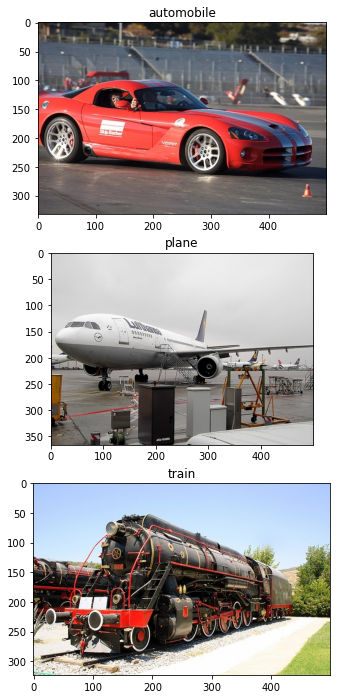

In [63]:
src_folder = "data/voc"
fig = plt.figure(figsize=(12, 12))
for root, folders, filenames in os.walk(src_folder):
    image_num = 0
    num_folders = len(folders)
    for folder in sorted(folders):
        image_num +=1
        file_name = os.listdir(os.path.join(root,folder))[0]
        file_path = os.path.join(root,folder, file_name)
        image = mp_image.imread(file_path)
        a=fig.add_subplot(num_folders, 1, image_num)
        image_plot = plt.imshow(image)
        a.set_title(folder)
        print("Image Name:",file_name)
        print("Image Directory:",file_path)
        
# Show the plot
plt.show()

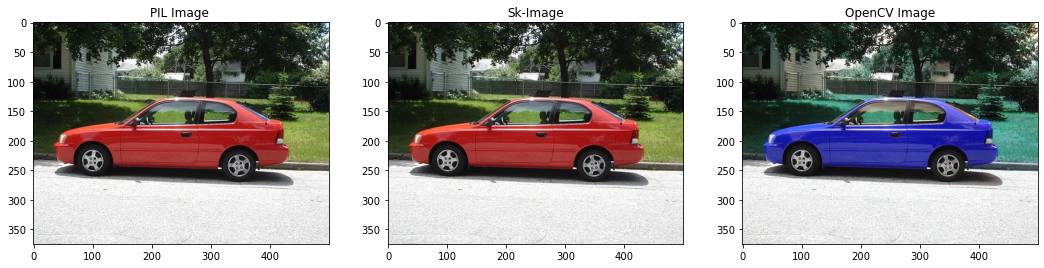

In [64]:

from PIL import Image
import skimage as sk
from skimage import io as sk_io
import cv2

images = []

# pil_image = Image.open(os.path.join(src_folder, "automobile", "000522.jpg"))
# images.append(pil_image)
# sk_image = sk_io.imread(os.path.join(src_folder, "plane", "000228.jpg"))
# images.append(sk_image)
# cv_image = cv2.imread(os.path.join(src_folder, "train", "000712.jpg"))
# images.append(cv_image)
pil_image = Image.open(os.path.join(src_folder, "automobile", "000522.jpg"))
images.append(pil_image)
sk_image = sk_io.imread(os.path.join(src_folder, "automobile", "000522.jpg"))
images.append(sk_image)
cv_image = cv2.imread(os.path.join(src_folder, "automobile", "000522.jpg"))
images.append(cv_image)

# Set up a figure of an appropriate size
fig = plt.figure(figsize=(18, 18))

image_num = 0
num_images = len(images)
# loop through the images
for image_idx in range(num_images):
    # Keep an incrementing count of each image
    a=fig.add_subplot(1, num_images, image_idx+1)
    # Add the image to the plot
    image_plot = plt.imshow(images[image_idx])
    # Add a caption with the folder name
    if image_idx == 0:
        a.set_title("PIL Image ")
    elif image_idx == 1:
        a.set_title("Sk-Image")
    else:
        a.set_title("OpenCV Image")
        
# Show the plot
plt.show()

Text(0.5, 1.0, 'OpenCV Color Changed')

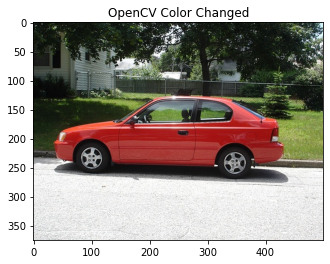

In [65]:
cv_image_rgb = cv2.cvtColor(cv_image, cv2.COLOR_BGR2RGB)
plt.imshow(cv_image_rgb)
plt.title("OpenCV Color Changed")

In [66]:
print("Type of OpenCV: ", type(cv_image_rgb))
print("Type of Sk-Image: ",type (sk_image))
print("Type of Pillow: ",type (pil_image))

Type of OpenCV:  <class 'numpy.ndarray'>
Type of Sk-Image:  <class 'numpy.ndarray'>
Type of Pillow:  <class 'PIL.JpegImagePlugin.JpegImageFile'>


<class 'numpy.ndarray'>


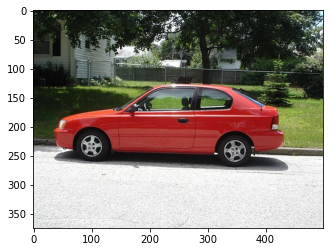

In [67]:
pil_array = np.array(pil_image)
plt.imshow(pil_array)
print(type(pil_array))

Sk-Image Shape: (375, 500, 3)


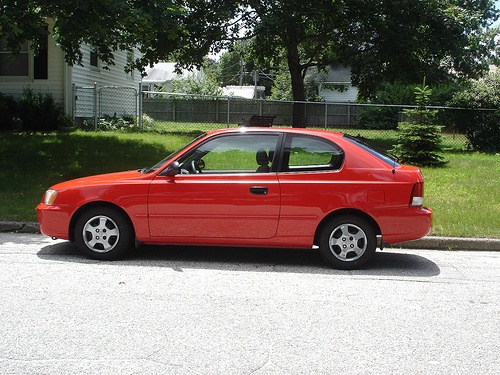

In [68]:
pil_sk_image = Image.fromarray(sk_image)
print("Sk-Image Shape:",sk_image.shape)
pil_sk_image

In [69]:
print("Sk-Image Shape:",sk_image.shape)
print("OpenCV Shape:",cv_image.shape)

Sk-Image Shape: (375, 500, 3)
OpenCV Shape: (375, 500, 3)


(375, 500)


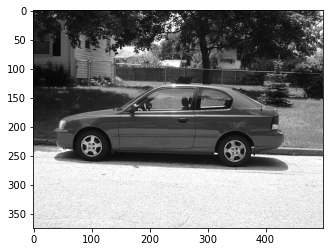

In [70]:
sk_gray_image = sk.color.rgb2gray(sk_image)
print(sk_gray_image.shape)
plt.imshow(sk_gray_image,"gray")
plt.show()

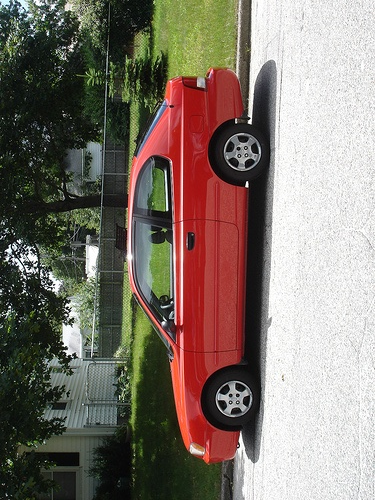

In [71]:
rotate_img = pil_image.rotate(90, expand=1)
rotate_img

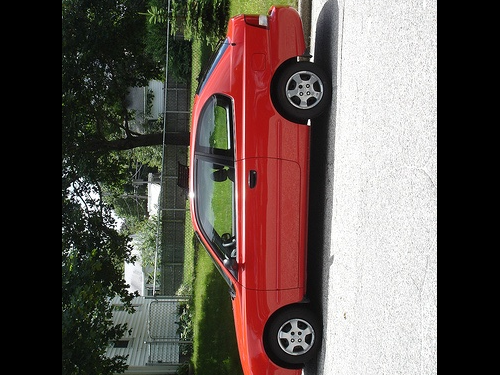

In [72]:
rotate_img = pil_image.rotate(90)
rotate_img

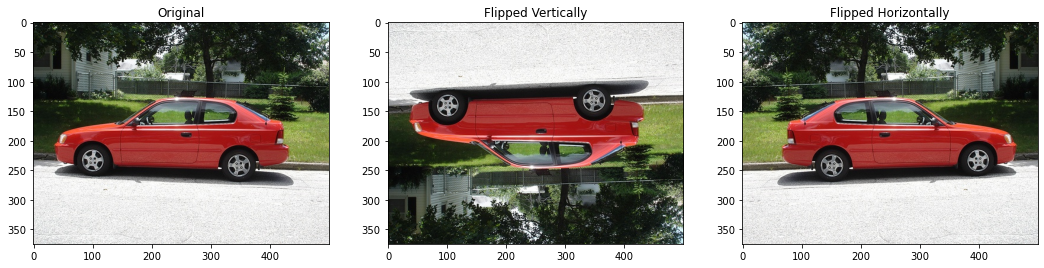

In [73]:
import numpy as np
upended_cv_image_rgb = np.flip(cv_image_rgb, axis=0)
mirrored_cv_image_rgb = np.flip(cv_image_rgb, axis=1)

fig = plt.figure(figsize=(18, 18))

# Plot original image
a=fig.add_subplot(1, 3, 1)
image_plot_1 = plt.imshow(cv_image_rgb)
a.set_title("Original")

# Plot upended image
a=fig.add_subplot(1, 3, 2)
image_plot_2 = plt.imshow(upended_cv_image_rgb)
a.set_title("Flipped Vertically")

# Plot mirrored image
a=fig.add_subplot(1, 3, 3)
image_plot_3 = plt.imshow(mirrored_cv_image_rgb)
a.set_title("Flipped Horizontally")
plt.show()

Original size: 500 x 375
New size: 150 x 113


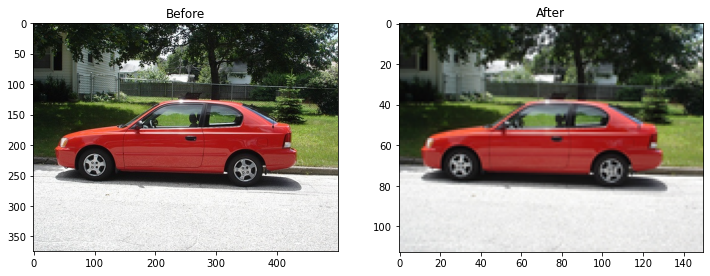

In [75]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline


# Get the PIL image size
o_h, o_w = pil_image.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 150 pixels on its widest dimensions
target_size = (150,150)
resized_img = pil_image.copy()
resized_img.thumbnail(target_size, Image.ANTIALIAS)
n_h, n_w = resized_img.size
print('New size:', n_h, 'x', n_w)

# Show the original and resized images
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(pil_image)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(resized_img)
a.set_title('After')

plt.show()


In [76]:
def resize_image(src_image, size=(200,200), bg_color="white"): 
    from PIL import Image, ImageOps 
    
    # resize the image so the longest dimension matches our target size
    src_image.thumbnail(size, Image.ANTIALIAS)
    
    # Create a new square background image
    new_image = Image.new("RGB", size, bg_color)
    
    # Paste the resized image into the center of the square background
    new_image.paste(src_image, (int((size[0] - src_image.size[0]) / 2), int((size[1] - src_image.size[1]) / 2)))
  
    # return the resized image
    return new_image


Original size: 500 x 375


c:\users\prasa\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


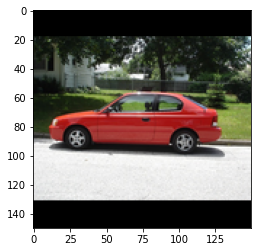

In [81]:
o_h, o_w = pil_image.size
print('Original size:', o_h, 'x', o_w)

# We'll resize this so it's 150 x 150 with black padding
target_size = (150,150)
pad_color = "black"
resized_img = resize_image(pil_image.copy(), target_size, pad_color)
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(resized_img)
a.set_title('After')
plt.show()